In [1]:
# importing required  libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('weather_toronto_daily.csv')
data.head(3)

date  max_dew_point_v  max_dew_point_s  max_dew_point_c  \
0  2022-03-01            -3.83             6.24              450   
1  2022-02-28            -3.86             6.17              450   
2  2022-02-27            -3.89             6.20              450   

         max_dew_point_d  max_relative_humidity_v  max_relative_humidity_s  \
0  1992-02-23 2021-03-08                    83.97                     9.73   
1  1992-02-21 2021-03-07                    84.18                     9.79   
2  1992-02-20 2021-03-06                    84.22                     9.83   

   max_relative_humidity_c max_relative_humidity_d  max_temperature_v  ...  \
0                      450   1992-02-23 2021-03-08               1.44  ...   
1                      450   1992-02-21 2021-03-07               1.29  ...   
2                      450   1992-02-20 2021-03-06               1.21  ...   

   snow_c                 snow_d snow_on_ground_v  snow_on_ground_s  \
0     449  1992-02-23 2021-03-08              5.5              6.89   
1     448  1992-02-21 2021-03-07              5.4              6.81   
2     449  1992-02-20 2021-03-06              5.2              6.69   

   snow_on_ground_c       snow_on_ground_d solar_radiation_v  \
0               415  1992-02-23 2021-03-04               NaN   
1               413  1992-02-21 2021-03-04               NaN   
2               414  1992-02-20 2021-03-04               NaN   

   solar_radiation_s  solar_radiation_c  solar_radiation_d  
0                NaN                NaN                NaN  
1                NaN                NaN                NaN  
2                NaN                NaN                NaN  

[3 rows x 53 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     4808 non-null   object 
 1   max_dew_point_v          4808 non-null   float64
 2   max_dew_point_s          4808 non-null   float64
 3   max_dew_point_c          4808 non-null   int64  
 4   max_dew_point_d          4808 non-null   object 
 5   max_relative_humidity_v  4808 non-null   float64
 6   max_relative_humidity_s  4808 non-null   float64
 7   max_relative_humidity_c  4808 non-null   int64  
 8   max_relative_humidity_d  4808 non-null   object 
 9   max_temperature_v        4808 non-null   float64
 10  max_temperature_s        4808 non-null   float64
 11  max_temperature_c        4808 non-null   int64  
 12  max_temperature_d        4808 non-null   object 
 13  max_wind_speed_v         4808 non-null   float64
 14  max_wind_speed_s        

In [4]:
# Dropping columns that do not have any data

data = data.drop(['solar_radiation_v','solar_radiation_s', 'solar_radiation_c', 'solar_radiation_d'], axis = 1)

 Suffix  Meaning
 1) _v Calculated value (max, min or mean)
 2) _s Standard deviation of mean
 3) _c Count of (number of) values included
 4) _d Date range for values

In [5]:
# Filtering only the columns that we need

df = data.filter(['date','max_dew_point_v', 'max_relative_humidity_v','max_temperature_v',
           'max_wind_speed_v', 'min_dew_point_v', 'min_relative_humidity_v', 'min_temperature_v', 
           'min_wind_speed_v', 'precipitation_v', 'rain_v', 'snow_v', 'snow_on_ground_v'], axis = 1)

In [6]:
# Checking for null values

df.isnull().sum()

date                       0
max_dew_point_v            0
max_relative_humidity_v    0
max_temperature_v          0
max_wind_speed_v           0
min_dew_point_v            0
min_relative_humidity_v    0
min_temperature_v          0
min_wind_speed_v           0
precipitation_v            0
rain_v                     0
snow_v                     0
snow_on_ground_v           0
dtype: int64

In [7]:
# converting date to datetime object and fetching the year, month and day

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [8]:
# Adding a season column to the dataframe

season = []
for row in df['month']:
    if row in [1,2,3,12]: season.append('Winter')
    elif row in [4,5]:  season.append('Spring')
    elif row in [6,7,8]: season.append('Summer')
    else: season.append('Fall')
        
df['season'] = season

In [9]:
df.head(3)

date  max_dew_point_v  max_relative_humidity_v  max_temperature_v  \
0 2022-03-01            -3.83                    83.97               1.44   
1 2022-02-28            -3.86                    84.18               1.29   
2 2022-02-27            -3.89                    84.22               1.21   

   max_wind_speed_v  min_dew_point_v  min_relative_humidity_v  \
0             31.04           -11.06                    56.00   
1             31.05           -11.16                    56.28   
2             31.16           -11.10                    56.58   

   min_temperature_v  min_wind_speed_v  precipitation_v  rain_v  snow_v  \
0              -6.95              5.97             1.86    0.97    0.94   
1              -7.04              5.90             1.85    0.99    0.92   
2              -7.02              5.98             1.86    0.96    0.95   

   snow_on_ground_v  year  month  day  season  
0               5.5  2022      3    1  Winter  
1               5.4  2022      2   28  Winter  
2               5.2  2022      2   27  Winter

In [10]:
# checking unique year values

df['year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009], dtype=int64)

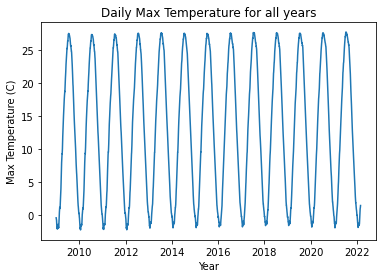

In [11]:
# Max temperature across the years

sns.lineplot(data = df, x = 'date', y = 'max_temperature_v')
plt.xlabel('Year')
plt.ylabel('Max Temperature (C)')
plt.title('Daily Max Temperature for all years')
plt.show()

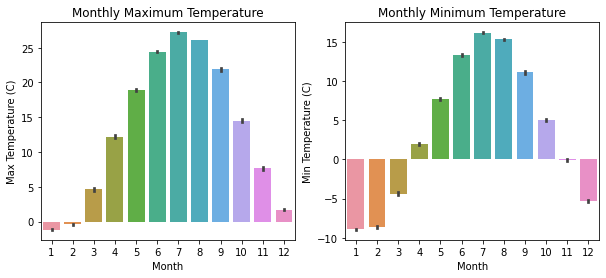

In [12]:
# Plotting minimum and maximum  temperature for all months

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10,4))
sns.barplot(x='month',y='max_temperature_v', data = df, ax=ax1)
ax1.set(xlabel="Month", ylabel = "Max Temperature (C)")
ax1.set_title('Monthly Maximum Temperature')
sns.barplot(x='month',y='min_temperature_v', data = df, ax=ax2)
ax2.set(xlabel="Month", ylabel = "Min Temperature (C)")
ax2.set_title('Monthly Minimum Temperature')
plt.show()

In [13]:
# Getting minimum and maximum temperature for each year and storing in a dataframe

min_temp = df.groupby('year').min()['min_temperature_v']
max_temp = df.groupby('year').max()['max_temperature_v']
min_temp.drop(2022, inplace = True) # because of insufficent data for min and max vaues in 2022
max_temp.drop(2022, inplace = True)
min_max = pd.concat([max_temp, min_temp], axis = 1).reset_index()

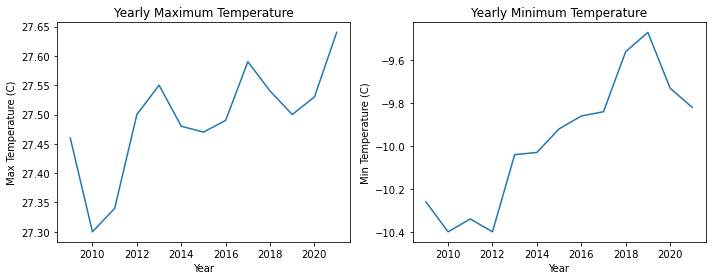

In [14]:
#Plotting minimum and maximum temperature for each year

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10,4))
sns.lineplot(x='year',y='max_temperature_v', data = min_max, ax=ax1)
ax1.set(xlabel="Year", ylabel = "Max Temperature (C)")
ax1.set_title('Yearly Maximum Temperature')
sns.lineplot(x='year',y='min_temperature_v', data = min_max, ax=ax2)
ax2.set(xlabel="Year", ylabel = "Min Temperature (C)")
ax2.set_title('Yearly Minimum Temperature')
fig.tight_layout()

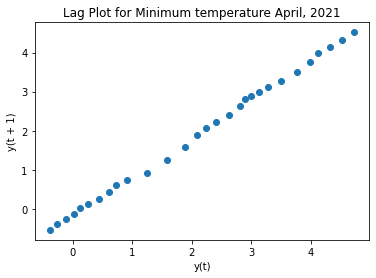

In [15]:
# Lag Plot for min temperature for April of 2021

pd.plotting.lag_plot(df[(df['month'] == 4) & (df['year'] == 2021)]['min_temperature_v'])
plt.title('Lag Plot for Minimum temperature April, 2021')
plt.show()

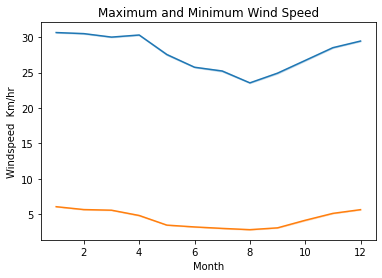

In [16]:
# Average max and min windspeeds over 12 months

sns.lineplot(x='month',y='max_wind_speed_v', data = df)
sns.lineplot(x='month',y='min_wind_speed_v', data = df)
plt.xlabel('Month')
plt.ylabel('Windspeed  Km/hr')
plt.title('Maximum and Minimum Wind Speed')
plt.show()

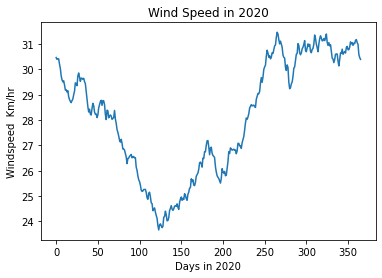

In [17]:
# max_windspeed for the year 2020

days = np.arange(0,366)
plt.plot(days, df[df['year']==2020]['max_wind_speed_v'])
plt.xlabel('Days in 2020')
plt.ylabel('Windspeed  Km/hr')
plt.title('Wind Speed in 2020')
plt.show()

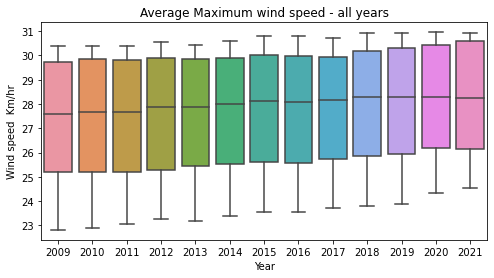

In [18]:
# Box plot for average maximum wind speed for all years

max_wind = df.groupby(['year', 'month']).agg({'max_wind_speed_v': 'mean'})['max_wind_speed_v'].reset_index()
plt.figure(figsize=(8,4))
sns.boxplot(data = max_wind[max_wind['year']<2022], x = 'year', y = 'max_wind_speed_v')
plt.xlabel('Year')
plt.ylabel('Wind speed  Km/hr')
plt.title('Average Maximum wind speed - all years')
plt.show()

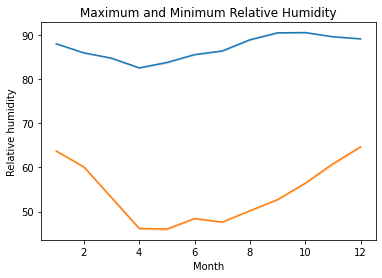

In [19]:
# Average max and min relative humidity over 12 months

sns.lineplot(x='month',y='max_relative_humidity_v', data = df)
sns.lineplot(x='month',y='min_relative_humidity_v', data = df)
plt.xlabel('Month')
plt.ylabel('Relative humidity')
plt.title('Maximum and Minimum Relative Humidity')
plt.show()

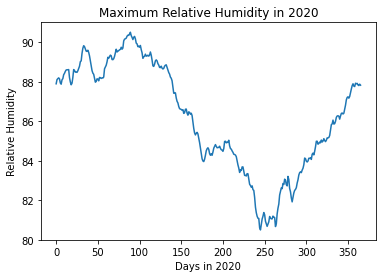

In [20]:
# max_relative_humidity for the year 2020

plt.plot(days, df[df['year']==2020]['max_relative_humidity_v'])
plt.xlabel('Days in 2020')
plt.ylabel('Relative Humidity')
plt.title('Maximum Relative Humidity in 2020')
plt.show()

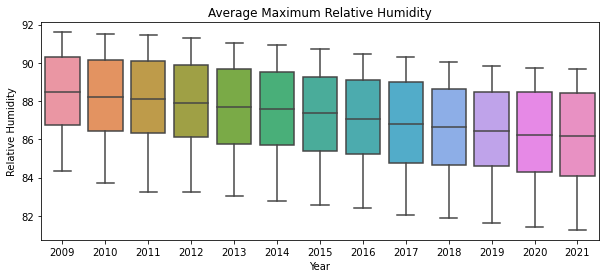

In [21]:
# Box plot for average maximum relative humidity for all years

max_humidity = df.groupby(['year', 'month']).agg({'max_relative_humidity_v': 'mean'})['max_relative_humidity_v'].reset_index()
plt.figure(figsize=(10,4))
sns.boxplot(data = max_humidity[max_humidity['year']<2022], x = 'year', y = 'max_relative_humidity_v')
plt.xlabel('Year')
plt.ylabel('Relative Humidity')
plt.title('Average Maximum Relative Humidity')
plt.show()

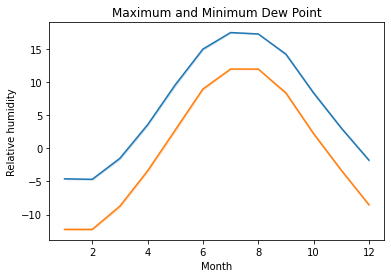

In [22]:
# Average max and min dew point over 12 months

sns.lineplot(x='month',y='max_dew_point_v', data = df)
sns.lineplot(x='month',y='min_dew_point_v', data = df)
plt.xlabel('Month')
plt.ylabel('Relative humidity')
plt.title('Maximum and Minimum Dew Point')
plt.show()

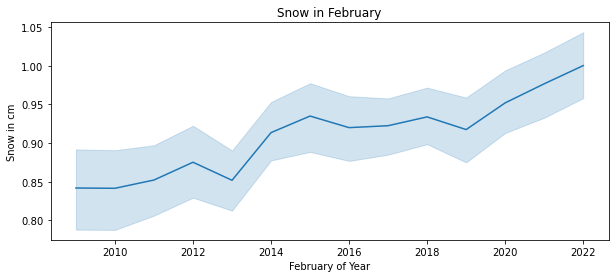

In [23]:
# Snowfall in the month of February over the years

Feb_only =  df.loc[df.month == 2]
plt.figure(figsize=(10,4))
feb = sns.lineplot(data = Feb_only, x= 'year', y = 'snow_v')
feb.set(xlabel = "February of Year", ylabel = "Snow in cm", title = 'Snow in February')
plt.show()

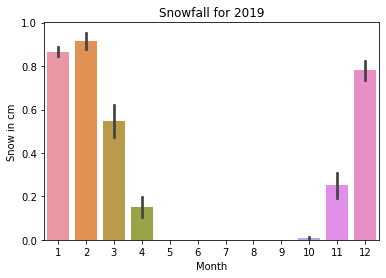

In [24]:
# Snowfall over the months of 2019

annual_snow = df[df['year'] == 2019][['month', 'snow_v']]
sns.barplot(data = annual_snow, x = 'month', y = 'snow_v')
plt.xlabel('Month')
plt.ylabel('Snow in cm')
plt.title('Snowfall for 2019')
plt.show()

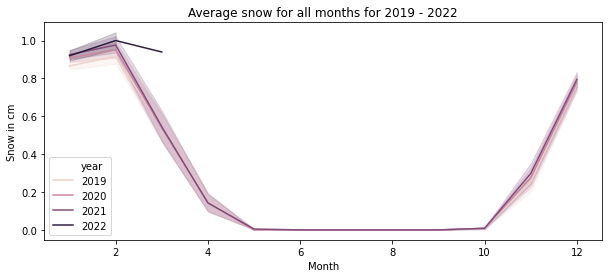

In [25]:
# average snow for each month in specific years

snow = df[(df['year'] > 2018)][['year','month', 'snow_v']]
plt.figure(figsize=(10,4))
fig = sns.lineplot(data = snow, x= 'month', y = 'snow_v', hue = 'year')
fig.set(xlabel = "Month", ylabel = "Snow in cm", title = 'Average snow for all months for 2019 - 2022')
plt.show()

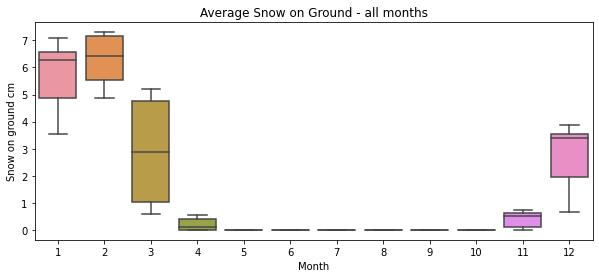

In [26]:
# Box plot for average snow on ground for all months

max_snow = df.groupby(['month', 'day']).agg({'snow_on_ground_v': 'mean'})['snow_on_ground_v'].reset_index()
plt.figure(figsize=(10,4))
sns.boxplot(data = max_snow, x = 'month', y = 'snow_on_ground_v')
plt.xlabel('Month')
plt.ylabel('Snow on ground cm')
plt.title('Average Snow on Ground - all months')
plt.show()

In [27]:
# Pivot table for monthly rainfall for every year

rain = df.pivot_table(index='month', columns='year', values = 'rain_v', aggfunc= np.mean)
rain.drop(2022, inplace=True, axis = 1) # to avoid NaN values for missing future data
print(rain)

year       2009      2010      2011      2012      2013      2014      2015  \
month                                                                         
1      0.891290  0.850323  0.834839  0.840645  0.864194  0.882581  0.894194   
2      0.821786  0.858929  0.853929  0.827241  0.836786  0.833571  0.809643   
3      1.037742  1.076452  1.083871  1.142903  1.116774  1.067419  1.033548   
4      2.106333  2.155667  2.084333  2.128000  2.129667  2.152000  2.172667   
5      2.385484  2.353871  2.357097  2.447742  2.464839  2.443226  2.419032   
6      2.225333  2.223000  2.310333  2.297333  2.250333  2.327667  2.366333   
7      2.545161  2.570000  2.514839  2.490000  2.529032  2.719677  2.741613   
8      2.430323  2.501613  2.502903  2.433871  2.399355  2.347097  2.338710   
9      2.469667  2.455667  2.464000  2.429000  2.413667  2.425667  2.455667   
10     2.147742  2.141290  2.125484  2.141613  2.186774  2.177097  2.188710   
11     2.063000  2.013000  2.041667  2.061333  2.011

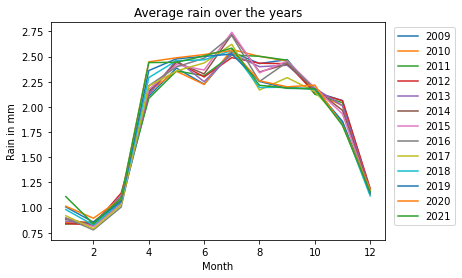

In [28]:
# Rainfall in different months over the years

rain.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Rain in mm')
plt.title('Average rain over the years')
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='best')

In [29]:
# Making a pivot table of seasonal rainfall

rain_s = df.pivot_table(index='year', columns='season', values = 'rain_v', aggfunc= np.mean)
rain_s.drop(2022, inplace=True, axis = 0) # to avoid NaN values for missing future data in 2022
print(rain_s)

season      Fall    Spring    Summer    Winter
year                                          
2009    2.225934  2.248197  2.402174  0.983471
2010    2.202637  2.256393  2.433804  0.981653
2011    2.209451  2.222951  2.444130  0.980826
2012    2.209890  2.290492  2.408261  1.003361
2013    2.203626  2.300000  2.394457  1.001653
2014    2.189341  2.300000  2.466304  0.991488
2015    2.191319  2.297869  2.483478  0.975041
2016    2.152088  2.305410  2.481739  0.965164
2017    2.098462  2.282951  2.408478  0.976942
2018    2.069670  2.376393  2.406196  0.999256
2019    2.075385  2.420328  2.425543  1.019917
2020    2.080110  2.468033  2.445978  1.045410
2021    2.061978  2.441639  2.434022  1.054215


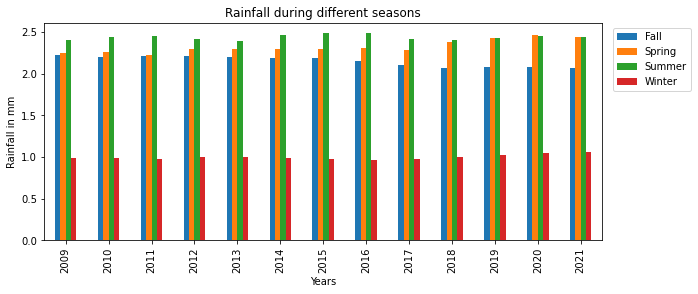

In [30]:
# Rainfall in different seasons - barplot

fig, ax = plt.subplots(figsize=(10, 4))
seasonal_rain = rain_s.plot(kind='bar', ax = ax)
plt.legend(bbox_to_anchor=(1.01, 1.0), loc='best')
seasonal_rain.set( xlabel = "Years", ylabel = "Rainfall in mm", title = 'Rainfall during different seasons')
plt.show()

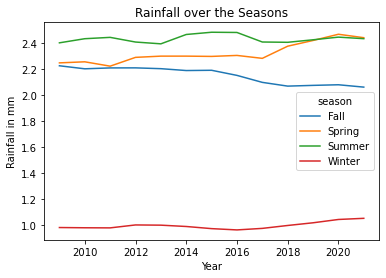

In [31]:
# Rainfall in different seasons - lineplot

rain_s.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Rainfall in mm')
plt.title('Rainfall over the Seasons')
plt.show()

In [32]:
# Average rainfall on different weekdays

df['weekday'] = df['date'].dt.day_name()
rain_2019 = df[(df['year']==2019)].groupby('weekday').mean()['rain_v'].sort_values(ascending=True)
rain_2020 = df[(df['year']==2020)].groupby('weekday').mean()['rain_v'].sort_values(ascending=True)

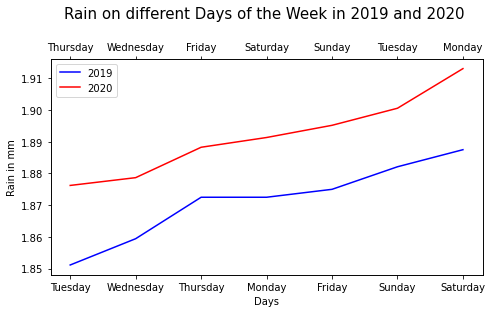

In [33]:
# Rain on different Days of the Week in 2019 and 2020. 
# Checking my thoughts on whether it actually rains more on the weekends!!

fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twiny()

lns1 = ax1.plot(rain_2019, color='blue', label='2019')
lns2 = ax2.plot(rain_2020, color='red', label='2020')

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)
plt.title('Rain on different Days of the Week in 2019 and 2020 \n', fontsize=15)
ax1.set(xlabel="Days", ylabel = "Rain in mm")
plt.show()

Surprise!! It did rain more on the weekends in 2019 but not in 2020 where Mondays were more rainy.

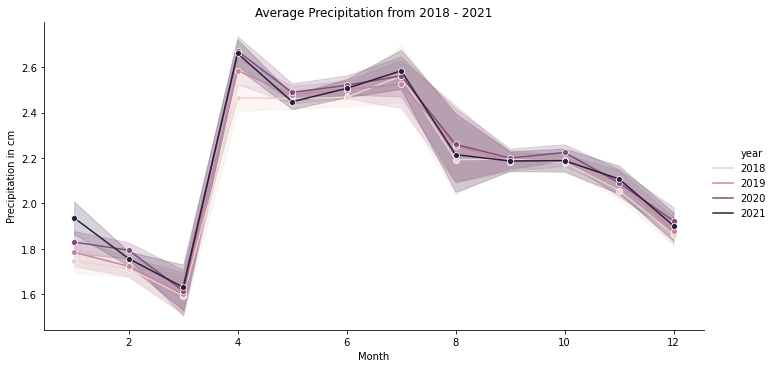

In [34]:
# Average Precipitation for each month in last 4 years

precpt_monthly = df[(df['year'] >= 2018) &(df['year']<2022)][['year','month','precipitation_v']]
sns.relplot(kind='line', data =precpt_monthly, x='month', y='precipitation_v', hue = 'year',aspect=2, marker='o')
plt.xlabel('Month')
plt.ylabel('Precipitation in cm')
plt.title('Average Precipitation from 2018 - 2021')
plt.show()

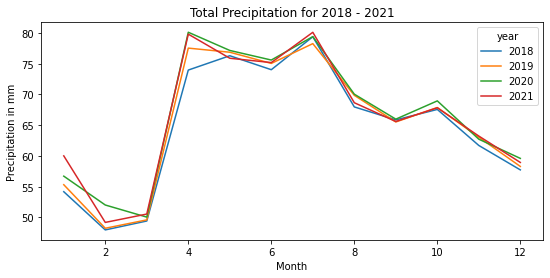

In [35]:
# Total Precipitation for each month in the last 4 years

(precpt_monthly.groupby(['year','month']).sum()['precipitation_v'].unstack('year').plot.line(figsize = (9,4)))
plt.xlabel('Month')
plt.ylabel('Precipitation in mm')
plt.title('Total Precipitation for 2018 - 2021')
plt.show()

In [36]:
# Maximum and minimum dew point values over the months using plotly

subfig = make_subplots(specs=[[{"secondary_y": True}]])
fig = px.line(df[df['year']==2020].groupby('month').mean()['max_dew_point_v'], render_mode="webgl", width=200, height=100)
fig2 = px.line(df[df['year']==2020].groupby('month').mean()['min_dew_point_v'], render_mode="webgl", width=200, height=100)

fig2.update_traces(yaxis="y2")
fig2.update_layout(autosize=False, width=200,height=100)

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Month"
subfig.layout.yaxis.title="Max Dew"
subfig.layout.yaxis2.title="Min Dew"
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))

subfig.show()

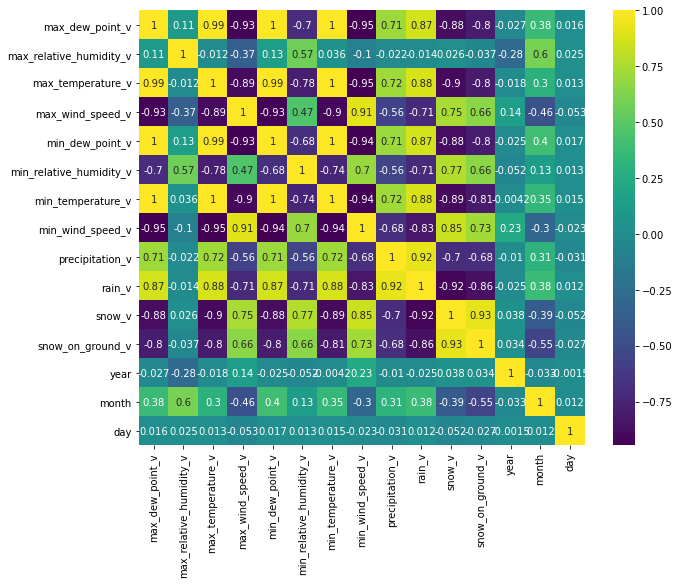

In [37]:
# Correlation Heat map of the weather data attributes

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

In [38]:
# Getting the yearly min and max data

yearly_data = df.groupby('year').agg({'min_temperature_v':'min', 'max_temperature_v':'max', 'max_wind_speed_v':'max', 
                                      'snow_v': 'sum', 'rain_v': 'sum'})[['min_temperature_v','max_temperature_v', 
                                                                          'max_wind_speed_v', 'snow_v', 'rain_v']].reset_index()
yearly_data

year  min_temperature_v  max_temperature_v  max_wind_speed_v  snow_v  \
0   2009             -10.26              27.46             31.28  109.95   
1   2010             -10.40              27.30             31.41  108.75   
2   2011             -10.34              27.34             31.22  107.18   
3   2012             -10.40              27.50             31.29  110.10   
4   2013             -10.04              27.55             31.22  106.33   
5   2014             -10.03              27.48             31.41  107.73   
6   2015              -9.92              27.47             31.60  108.85   
7   2016              -9.86              27.49             31.30  106.39   
8   2017              -9.84              27.59             31.34  106.10   
9   2018              -9.56              27.54             31.46  105.40   
10  2019              -9.47              27.50             31.42  106.10   
11  2020              -9.73              27.53             31.47  109.54   
12  2021              -9.82              27.64             31.46  111.23   
13  2022              -9.74               1.44             31.51   57.47   

    rain_v  
0   679.70  
1   680.77  
2   680.20  
3   684.79  
4   682.32  
5   686.40  
6   686.04  
7   682.54  
8   670.01  
9   675.58  
10  683.06  
11  692.41  
12  688.07  
13   58.42

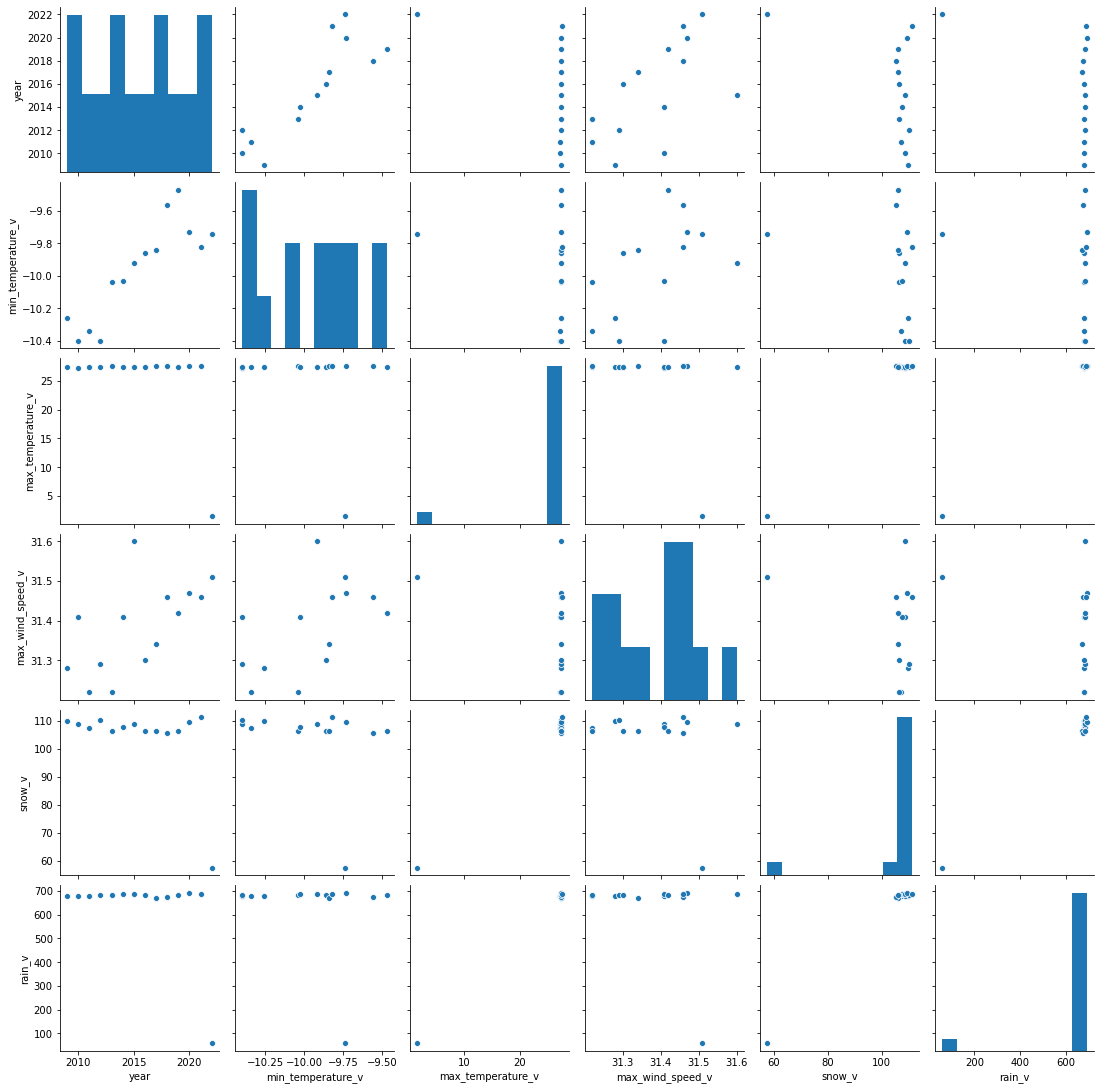

In [39]:
# Pairplot of yearly data

sns.pairplot(yearly_data)

In [40]:
# Plotly representation to show entire dataset

fig = px.bar(df, x='year', y='day', 
             hover_data=['month','day','max_temperature_v','min_temperature_v','rain_v', 'snow_v'], 
             color='max_temperature_v',
             title = 'Daily Data for all Years',
             labels={'max_temperature_v':'max temp','min_temperature_v': 'min temp','max_wind_speed_v':'windspeed',
                    'rain_v':'rain', 'snow_v': 'snow'}, 
             height=400)
fig.show()